**Problem 2 ML Project**


1.   Ahmed Gamal Ahmed - 20221459969
2.   Moataz Saied Saleh - 20221465979
3.   Mona Badr Mostafa - 2103111
4.   Myar Hany Mohamed - 20221376556



# Importing Libraries




In [ ]:
import numpy as np # Numpy
import pandas as pd # Pandas
from sklearn.cluster import KMeans # k Means
from sklearn.preprocessing import MinMaxScaler # K Means Scaler
from matplotlib import pyplot as plt # Plotting
import plotly.express as px # Plotting
from sklearn.preprocessing import StandardScaler # PCA Scaler
from sklearn.decomposition import PCA # PCA
from sklearn.manifold import TSNE # TSNE
import seaborn as sns # Plotting
%matplotlib inline


# Loading The Dataset

In [ ]:
# loading Heart.csv from drive
from google.colab import drive
drive.mount('/content/Files')
path = '/content/Files/MyDrive/'

MessageError: ignored

In [ ]:

# Importing dataset using padas
dataset = pd.read_csv(path+"/Heart.csv")
dataset.drop(dataset.columns[0],1,inplace = True) # Dropping the ID column from dataset
dataset.head()


<ipython-input-3-f1f14335d1de>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  dataset.drop(dataset.columns[0],1,inplace = True) # Dropping the ID column from dataset


,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,1,145,233,1,2,150,0,2.3,3,0,0,0
1,67,1,2,160,286,0,2,108,1,1.5,2,3,1,1
2,67,1,2,120,229,0,2,129,1,2.6,2,2,2,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,1,0
4,41,0,0,130,204,0,2,172,0,1.4,1,0,1,0


# Information About Dataset

In [ ]:
dataset.describe()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,1.877888,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.702970,1.339934,0.458746
std,9.038662,0.467299,1.004101,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.968489,0.597973,0.499120
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,1.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,3.000000,1.000000


In [ ]:
# check the outout, you will understand every thing in the data
variables = dataset.columns[0]
for i in range(len(dataset.columns)):
  if(i==0):
    continue
  else:
    variables = variables + ", "+ dataset.columns[i]

print("We have "+str(len(dataset.columns))+" variables: "+variables+".")
print("We have data about "+str(len(dataset))+" patients.")

print("\n1) Age: Ages measured in years")
print("Minimum = "+str(dataset['Age'].min())+", Maximum = "+str(dataset['Age'].max())+" , Average = "+str(dataset['Age'].mean()))

print("\n2) Sex: (0 = Females, 1 =Male)")
print("Number of (0) = "+str((dataset['Sex'] == 0).sum())+", Number of (1) = "+str((dataset['Sex'] == 1).sum()))

print("\n3) ChestPain: (0 = typical angina; 1 = atypical angina; 2 = non-anginal pain; 3 = asymptomatic)")
print("Number of (0) = "+str((dataset['ChestPain'] == 0).sum())+", Number of (1) = "+str((dataset['ChestPain'] == 1).sum())+", Number of (2) = "+str((dataset['ChestPain'] == 2).sum())+", Number of (3) = "+str((dataset['ChestPain'] == 3).sum()))

print("\n4) RestBP: blood pressure in mm Hg")
print("Minimum = "+str(dataset['RestBP'].min())+", Maximum = "+str(dataset['RestBP'].max())+" , Average = "+str(dataset['RestBP'].mean()))

print("\n5) Cholestoral in mg/dl")
print("Minimum = "+str(dataset['Chol'].min())+", Maximum = "+str(dataset['Chol'].max())+" , Average = "+str(dataset['Chol'].mean()))

print("\n6) Fbs: Fasting Blood Sugar (0 = false, 1 = true)")
print("Number of (0) = "+str((dataset['Fbs'] == 0).sum())+", Number of (1) = "+str((dataset['Fbs'] == 1).sum()))

print("\n7) RestECG: Resting Electrocardiographic results (0 = normal; 1 = having ST-T; 2 = hypertrophy)")
print("Minimum = "+str(dataset['RestECG'].min())+", Maximum = "+str(dataset['RestECG'].max())+" , Average = "+str(dataset['RestECG'].mean()))

print("\n8) MaxHR: Maximum heart rate achieved")
print("Minimum = "+str(dataset['MaxHR'].min())+", Maximum = "+str(dataset['MaxHR'].max())+" , Average = "+str(dataset['MaxHR'].mean()))

print("\n9) ExAng: Exang exercise: induced angina (0 = false, 1 = true)")
print("Number of (0) = "+str((dataset['ExAng'] == 0).sum())+", Number of (1) = "+str((dataset['ExAng'] == 1).sum()))

print("\n10) Oldpeak: ST depression induced by exercise relative to rest")
print("Minimum = "+str(dataset['Oldpeak'].min())+", Maximum = "+str(dataset['Oldpeak'].max())+" , Average = "+str(dataset['Oldpeak'].mean()))

print("\n11) Slope: The slope of the peak exercise ST segment (1 = upsloping; 2 = flat; 3 = downsloping) ")
print(" Number of (1) = "+str((dataset['Slope'] == 1).sum())+", Number of (2) = "+str((dataset['Slope'] == 2).sum())+", Number of (3) = "+str((dataset['Slope'] == 3).sum()))

print("\n12) ca: number of major vessels (0-3) colored by flourosopy (0 = ..; 1 = ..; 2 = ..; 3 = ..)")
print("Number of (0) = "+str((dataset['Ca'] == 0).sum())+", Number of (1) = "+str((dataset['Ca'] == 1).sum())+", Number of (2) = "+str((dataset['Ca'] == 2).sum())+", Number of (3) = "+str((dataset['Ca'] == 3).sum()))

print("\n13) Thal: (0 = ..; 1 = ..; 2 = ..; 3 = ..)")
print("Number of (0) = "+str((dataset['Thal'] == 0).sum())+", Number of (1) = "+str((dataset['Thal'] == 1).sum())+", Number of (2) = "+str((dataset['Thal'] == 2).sum())+", Number of (3) = "+str((dataset['Thal'] == 3).sum()))

print("\n14) AHD: Heart Disease (0 = Fales, 1 =True)")
print("Number of (0) = "+str((dataset['AHD'] == 0).sum())+", Number of (1) = "+str((dataset['AHD'] == 1).sum()))



We have 14 variables: Age, Sex, ChestPain, RestBP, Chol, Fbs, RestECG, MaxHR, ExAng, Oldpeak, Slope, Ca, Thal, AHD.
We have data about 303 patients.

1) Age: Ages measured in years
Minimum = 29, Maximum = 77 , Average = 54.43894389438944

2) Sex: (0 = Females, 1 =Male)
Number of (0) = 97, Number of (1) = 206

3) ChestPain: (0 = typical angina; 1 = atypical angina; 2 = non-anginal pain; 3 = asymptomatic)
Number of (0) = 50, Number of (1) = 23, Number of (2) = 144, Number of (3) = 86

4) RestBP: blood pressure in mm Hg
Minimum = 94, Maximum = 200 , Average = 131.68976897689768

5) Cholestoral in mg/dl
Minimum = 126, Maximum = 564 , Average = 246.69306930693068

6) Fbs: Fasting Blood Sugar (0 = false, 1 = true)
Number of (0) = 258, Number of (1) = 45

7) RestECG: Resting Electrocardiographic results (0 = normal; 1 = having ST-T; 2 = hypertrophy)
Minimum = 0, Maximum = 2 , Average = 0.9900990099009901

8) MaxHR: Maximum heart rate achieved
Minimum = 71, Maximum = 202 , Average = 149.607260

# Plotting Our Data

We did a research about how to plot multi-dimensional data and found that there is some ways to plot the data as 4D Plot or 5D Plot. Ofcourse we can also plot 1D, 2D, 3D but we prefered to try the new plots(4D , 5D).

Plotting our dataset using 4 Features Representation (Age, RestBP, MaxHR, Chol)

In [ ]:
fig1 = px.scatter(dataset, x="Age", y="RestBP",color="MaxHR",size="Chol") # Using scatter plot from plotly
fig1.update_layout(title="4 Features Representation of Dataset")

fig1.show()

Plotting our dataset using 5 Features Representation (Age, RestBP, MaxHR, Oldpeak, Chol)

In [ ]:
fig2 = px.scatter_3d(dataset, x="Age", y="RestBP",z="MaxHR", color="Oldpeak",size="Chol") # Using scatter_3d plot from plotly
fig2.update_layout(title="5 Features Representation of Dataset")

fig2.show()

# K-Means Clustering


In [ ]:
df_kmeans = dataset.copy() # copying the dataset to use in K Means

**Scaling the data** : Here we are scaling all our numeric data to be ranged ONLY from zero to one to make sure that results are more accurate while applying the K-Means Algorithm

In [ ]:
scaler = MinMaxScaler()
scaling = True # CONVERT THIS TO TRUE IF YOU WANT TO SCALE YOUR DATA <-------
if(scaling == True):
  scaler.fit(df_kmeans[['ChestPain']])
  df_kmeans['ChestPain']=scaler.transform(df_kmeans[['ChestPain']])

  scaler.fit(df_kmeans[['RestECG']])
  df_kmeans['RestECG']=scaler.transform(df_kmeans[['RestECG']])

  scaler.fit(df_kmeans[['Oldpeak']])
  df_kmeans['Oldpeak']=scaler.transform(df_kmeans[['Oldpeak']])

  scaler.fit(df_kmeans[['Ca']])
  df_kmeans['Ca']=scaler.transform(df_kmeans[['Ca']])

  scaler.fit(df_kmeans[['Thal']])
  df_kmeans['Thal']=scaler.transform(df_kmeans[['Thal']])

  scaler.fit(df_kmeans[['Slope']])
  df_kmeans['Slope']=scaler.transform(df_kmeans[['Slope']])

  scaler.fit(df_kmeans[['Age']])
  df_kmeans['Age']=scaler.transform(df_kmeans[['Age']])

  scaler.fit(df_kmeans[['RestBP']])
  df_kmeans['RestBP']=scaler.transform(df_kmeans[['RestBP']])

  scaler.fit(df_kmeans[['Chol']])
  df_kmeans['Chol']=scaler.transform(df_kmeans[['Chol']])

  scaler.fit(df_kmeans[['MaxHR']])
  df_kmeans['MaxHR']=scaler.transform(df_kmeans[['MaxHR']])

df_kmeans.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,0.708333,1,0.333333,0.481132,0.244292,1,1.0,0.603053,0,0.370968,1.0,0.000000,0.000000,0
1,0.791667,1,0.666667,0.622642,0.365297,0,1.0,0.282443,1,0.241935,0.5,1.000000,0.333333,1
2,0.791667,1,0.666667,0.245283,0.235160,0,1.0,0.442748,1,0.419355,0.5,0.666667,0.666667,1
3,0.166667,1,1.000000,0.339623,0.283105,0,0.0,0.885496,0,0.564516,1.0,0.000000,0.333333,0
4,0.250000,0,0.000000,0.339623,0.178082,0,1.0,0.770992,0,0.225806,0.0,0.000000,0.333333,0


# Choosing Number of Centroids
We we will use the Elbow Method to determing the best value of K

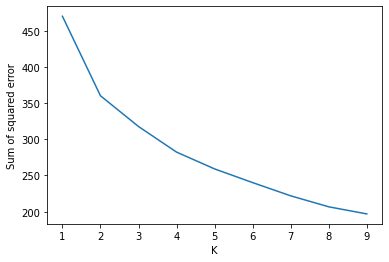

In [ ]:
sse = [] # Inertia vector (Sum Squared Error)
k_rng = range(1,10) # different values for K (number of clusters)
for k in k_rng: # trying each value of K
    km = KMeans(n_clusters=k) # try the current K value in KMeans
    km.fit(df_kmeans) # fit the model
    sse.append(km.inertia_) # add the interia (Sum of Squared error) to array

plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse) # On X axis: values of K, On Y axis: values of SSE

#ELBOW METHOD: when you find the shape of Elbow in your plot: use the X value for K

# Applying K-Means Algorithm

In [ ]:
km = KMeans(n_clusters=2) # Applying The K-Means Algorithm with 2 centriods
clusters = km.fit_predict(df_kmeans) # Array of length = number of patients, having the cluster of each patient [1, 0, 1, 1, ...]

In [ ]:
df_kmeans['Cluster'] = clusters # Adding Cluster column to our dataset
df_kmeans.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD,Cluster
0,0.708333,1,0.333333,0.481132,0.244292,1,1.0,0.603053,0,0.370968,1.0,0.000000,0.000000,0,1
1,0.791667,1,0.666667,0.622642,0.365297,0,1.0,0.282443,1,0.241935,0.5,1.000000,0.333333,1,0
2,0.791667,1,0.666667,0.245283,0.235160,0,1.0,0.442748,1,0.419355,0.5,0.666667,0.666667,1,0
3,0.166667,1,1.000000,0.339623,0.283105,0,0.0,0.885496,0,0.564516,1.0,0.000000,0.333333,0,1
4,0.250000,0,0.000000,0.339623,0.178082,0,1.0,0.770992,0,0.225806,0.0,0.000000,0.333333,0,1


# Clusters Results with K-Means

Resulted Centroids

In [ ]:
centriods = km.cluster_centers_ # Get the clusters' centeriods
print(centriods)

[[5.75539568e-01 8.20143885e-01 6.49880096e-01 3.82720239e-01
  2.86472192e-01 1.58273381e-01 5.86330935e-01 5.21061014e-01
  5.46762590e-01 2.53887213e-01 4.13669065e-01 3.83693046e-01
  5.22781775e-01 1.00000000e+00]
 [4.91361789e-01 5.60975610e-01 6.05691057e-01 3.32547170e-01
  2.66301927e-01 1.40243902e-01 4.17682927e-01 6.67008006e-01
  1.40243902e-01 9.46105429e-02 2.04268293e-01 1.07723577e-01
  3.82113821e-01 8.88178420e-16]]


Resulted Clusters

In [ ]:
clusters_data = df_kmeans.groupby("Cluster") # split the data in the dataframe into two groups based on the cluster
print(clusters_data.get_group(0)) # the patients in cluster 0
print(clusters_data.get_group(1)) # the patients in cluster 1

          Age  Sex  ChestPain    RestBP      Chol  Fbs  RestECG     MaxHR  \
1    0.791667    1   0.666667  0.622642  0.365297    0      1.0  0.282443   
2    0.791667    1   0.666667  0.245283  0.235160    0      1.0  0.442748   
6    0.687500    0   0.666667  0.433962  0.324201    0      1.0  0.679389   
8    0.708333    1   0.666667  0.339623  0.292237    0      1.0  0.580153   
9    0.500000    1   0.666667  0.433962  0.175799    1      1.0  0.641221   
..        ...  ...        ...       ...       ...  ...      ...       ...   
297  0.583333    0   0.666667  0.433962  0.262557    0      0.0  0.396947   
298  0.333333    1   0.333333  0.150943  0.315068    0      0.0  0.465649   
299  0.812500    1   0.666667  0.471698  0.152968    1      0.0  0.534351   
300  0.583333    1   0.666667  0.339623  0.011416    0      0.0  0.335878   
301  0.583333    0   0.000000  0.339623  0.251142    0      1.0  0.786260   

     ExAng   Oldpeak  Slope        Ca      Thal  AHD  Cluster  
1        1 

# PCA Algorithm

In [ ]:
df_pca = dataset.copy() # copying the dataset to use it while working on PCA

scaler = StandardScaler() # Scaler
pca_scaled = scaler.fit_transform(df_pca) # scaling (normalizing our data)
pca_scaled


array([[ 0.94872647,  0.68620244, -0.87574894, ..., -0.72704292,
        -2.24449884, -0.92063075],
       [ 1.39200191,  0.68620244,  0.1218147 , ...,  2.37568953,
        -0.56941719,  1.08621182],
       [ 1.39200191,  0.68620244,  0.1218147 , ...,  1.34144538,
         1.10566446,  1.08621182],
       ...,
       [ 0.28381332,  0.68620244,  0.1218147 , ...,  0.30720123,
         1.10566446,  1.08621182],
       [ 0.28381332, -1.4572959 , -1.87331258, ...,  0.30720123,
        -0.56941719,  1.08621182],
       [-1.82174501,  0.68620244,  1.11937834, ...,  2.37568953,
        -0.56941719, -0.92063075]])

In [ ]:
pca_algo = PCA(8) # if we wrote decimals it means: percentage of information kept from dataset, else : we write the n_components
x_pca_algo = pca_algo.fit_transform(pca_scaled) # Applying the PCA Algorithm on our data (Result is coordinates on the dimensions you specified)
print("Shape before PCA: ",df_pca.shape)
print("Shape after PCA: ",x_pca_algo.shape)
print("Variance Ration: ",pca_algo.explained_variance_ratio_) # printing the variance
print("Accuracy (information): ",pca_algo.explained_variance_ratio_.sum()*100) # Accuracy = sum of variance * 100


Shape before PCA:  (303, 14)
Shape after PCA:  (303, 8)
Variance Ration:  [0.2282389  0.11141636 0.08567182 0.07707521 0.07423816 0.06931813
 0.06505433 0.05829304]
Accuracy (information):  76.93059649008796


In [ ]:
x_pca_algo_df = pd.DataFrame(x_pca_algo) # Converting from x_pca "np array" to dataframe to use it in the plotting
x_pca_algo_df.head()

,0,1,2,3,4,5,6,7
0,0.579674,1.541890,-0.639476,-2.952097,2.627967,0.296578,-0.534812,-0.375392
1,3.503376,1.144699,0.499931,0.342601,0.070644,1.335859,-0.615137,-0.188724
2,3.103095,-0.762830,0.163590,0.561818,-0.240189,0.617757,-0.758920,0.200984
3,-0.490323,-1.324238,-1.900912,-1.154925,1.086819,-1.973730,0.516944,2.054904
4,-2.295655,0.232903,-0.360873,0.410969,1.928204,0.198221,-0.092528,0.190230


# Plotting the PCA Results

Here we are plotting different data from n_components ranges from 2 to 4

**2D Representation of PCA (components = 2)**

[[ 5.79674345e-01  1.54188983e+00]
 [ 3.50337555e+00  1.14469875e+00]
 [ 3.10309495e+00 -7.62830375e-01]
 [-4.90323318e-01 -1.32423759e+00]
 [-2.29565516e+00  2.32902634e-01]
 [-2.23513933e+00 -5.15691723e-01]
 [ 2.30311834e+00  1.52544361e+00]
 [-1.16777929e+00  1.14995096e+00]
 [ 1.44258135e+00 -7.84925437e-02]
 [ 2.74328811e+00 -9.09670449e-01]
 [-1.32245724e+00 -3.68665717e-02]
 [-7.42248268e-01  1.77091915e+00]
 [ 1.32543859e+00  6.67221696e-01]
 [-2.37678939e+00 -1.22339007e+00]
 [-8.26309487e-01  3.91217186e-01]
 [-1.36475286e+00 -3.32632396e-01]
 [-2.00153718e-02 -2.16157146e+00]
 [-1.44631199e+00 -1.27537346e-01]
 [-1.80041486e+00  7.60304536e-01]
 [-2.25322232e+00 -3.68914641e-01]
 [ 4.20257848e-01 -6.78540011e-01]
 [-1.06659908e+00  2.74684924e+00]
 [ 2.72754322e-01 -3.56553060e-02]
 [ 1.29457771e+00 -3.48550742e-01]
 [ 2.82781523e+00 -1.04422946e+00]
 [-1.21792843e+00  1.43757057e-03]
 [-2.07811716e+00  1.60746970e+00]
 [ 9.68457882e-01  1.15819196e+00]
 [-1.75185420e+00 -3

[Text(0.5, 1.0, '2 Dimensional PCA Plotting')]

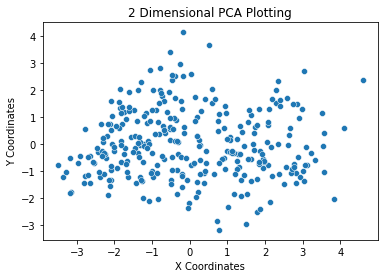

In [ ]:
pca_2d = PCA(2)
x_pca_2d = pca_2d.fit_transform(pca_scaled)
print(x_pca_2d)
x_pca_2d_df = pd.DataFrame(x_pca_2d)
x_pca_2d_df.columns = ['X Coordinates', 'Y Coordinates']

sns.scatterplot(x="X Coordinates", y="Y Coordinates",
                palette=sns.color_palette("hls", 10),
                data=x_pca_2d_df).set(title="2 Dimensional PCA Plotting")

**3D Representation of PCA (components = 3)**

In [ ]:
pca_3d = PCA(3)
x_pca_3d = pca_3d.fit_transform(pca_scaled)
print(x_pca_3d)
x_pca_3d_df = pd.DataFrame(x_pca_3d)
x_pca_3d_df.columns = ['X Coordinates', 'Y Coordinates', 'Z Coordinates']

pca_3d = px.scatter_3d(x_pca_3d_df, x="X Coordinates", y="Y Coordinates", z="Z Coordinates")
pca_3d.update_layout(title="3 Dimensional PCA Plotting")

pca_3d.show()

[[ 5.79674345e-01  1.54188983e+00 -6.39476188e-01]
 [ 3.50337555e+00  1.14469875e+00  4.99930668e-01]
 [ 3.10309495e+00 -7.62830375e-01  1.63590421e-01]
 [-4.90323318e-01 -1.32423759e+00 -1.90091225e+00]
 [-2.29565516e+00  2.32902634e-01 -3.60873487e-01]
 [-2.23513933e+00 -5.15691723e-01  5.27316500e-01]
 [ 2.30311834e+00  1.52544361e+00 -1.47277497e+00]
 [-1.16777929e+00  1.14995096e+00 -8.83764774e-01]
 [ 1.44258135e+00 -7.84925437e-02  5.29652424e-01]
 [ 2.74328811e+00 -9.09670449e-01  1.66396932e-01]
 [-1.32245724e+00 -3.68665717e-02 -1.19641393e+00]
 [-7.42248268e-01  1.77091915e+00 -9.85938901e-01]
 [ 1.32543859e+00  6.67221696e-01  4.15069374e-01]
 [-2.37678939e+00 -1.22339007e+00  1.16148286e+00]
 [-8.26309487e-01  3.91217186e-01  1.83385360e+00]
 [-1.36475286e+00 -3.32632396e-01 -1.14658335e-01]
 [-2.00153718e-02 -2.16157146e+00 -2.81567713e-01]
 [-1.44631199e+00 -1.27537346e-01  1.15783840e-02]
 [-1.80041486e+00  7.60304536e-01 -1.20787521e+00]
 [-2.25322232e+00 -3.68914641e-

**4D Representation of PCA (components = 4)**

In [ ]:
pca_4d = PCA(4)
x_pca_4d = pca_4d.fit_transform(pca_scaled)

x_pca_4d_df = pd.DataFrame(x_pca_4d)
x_pca_4d_df.columns = ['1st Dimension', '2nd Dimension', '3rd Dimension',"4th Dimension"]

pca_4d = px.scatter_3d(x_pca_4d_df, x="1st Dimension", y="2nd Dimension", z="3rd Dimension", color = "4th Dimension")
pca_4d.update_layout(title="4 Dimensional PCA Plotting")

pca_4d.show()

# K Means Algorithm Using PCA (2 Dimensions Data)

In [ ]:
pca_kmeans = PCA(2) # making sure that the n_components = 2
x_pca_kmeans = pca_kmeans.fit_transform(pca_scaled) # fitting the PCA
print("Shape before PCA: ",df_pca.shape)
print("Shape after PCA: ",x_pca_kmeans.shape)
print("Variance Ration: ",pca_kmeans.explained_variance_ratio_)
print("Accuracy (information): ",pca_kmeans.explained_variance_ratio_.sum()*100)


Shape before PCA:  (303, 14)
Shape after PCA:  (303, 2)
Variance Ration:  [0.2282389  0.11141636]
Accuracy (information):  33.96552614406926


In [ ]:
df_pca_kmeans = pd.DataFrame(x_pca_kmeans) # Converting from x_pca "np array" to dataframe to use it in the K Means algoritm
km = KMeans(n_clusters=2) # k Means on the PCA results
clusters = km.fit_predict(df_pca_kmeans) # Applying the K Means Algorithm on the new reduced data


In [ ]:
df_pca_kmeans['Cluster'] = clusters # Adding Cluster column to our dataframe
df_pca_kmeans.head()


,0,1,Cluster
0,0.579674,1.541890,1
1,3.503376,1.144699,1
2,3.103095,-0.762830,1
3,-0.490323,-1.324238,0
4,-2.295655,0.232903,0


In [ ]:
centriods = km.cluster_centers_ # Saving the centeriods generated
print(centriods)
centriods_x = centriods[ : ,0] # The x values for the centriods
centriods_y = centriods[ : ,1] # The y values for the centriods

[[-1.29846871  0.19539441]
 [ 1.77525019 -0.26714079]]


**Plotting the K Means result**

In [ ]:
cluster1 = df_pca_kmeans[df_pca_kmeans['Cluster']==0] # Grouping cluster 0
cluster2 = df_pca_kmeans[df_pca_kmeans['Cluster']==1] # Grouping cluster 1

plt.scatter(cluster1[0],cluster1[1],color='green') # Plotting cluster 0 with green color
plt.scatter(cluster2[0],cluster2[1],color='red') # Plotting cluster 1 with red color

plt.scatter(centriods_x , centriods_y,color='purple',marker='*',label='centroid') # Adding centriods to the plot

plt.xlabel('Value 1')
plt.ylabel('Value 2')
plt.legend()

NameError: ignored

# T-SNE Algorithm

In [ ]:
df_tsne = dataset.copy() # copying the dataset to use it in the T-SNE

In [ ]:
tsne = TSNE(n_components=2, verbose=1, random_state=123) # TSNE
x_tsne = tsne.fit_transform(df_tsne) # fitting the data on the T-SNE Model

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 303 samples in 0.001s...
[t-SNE] Computed neighbors for 303 samples in 0.011s...
[t-SNE] Computed conditional probabilities for sample 303 / 303
[t-SNE] Mean sigma: 17.056830
[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.099503
[t-SNE] KL divergence after 1000 iterations: 0.526951


**Get Clusters from the original dataset using K Means**

In [ ]:
df_tsne_result = pd.DataFrame(x_tsne) # # Converting from x_tsne "np array" to dataframe to use it in the K Means algoritm and plotting
df_tsne_result.columns = ['X','Y'] # renaming the columns resulted from T-SNE to X and Y
df_tsne_result["Cluster"] = clusters # Adding the clusters calculated from the K-Means Algorithm on the full dataset (14 Dimension)

df_tsne_result.head()

,X,Y,Cluster
0,5.482312,-0.017430,1
1,-10.673324,7.905264,1
2,13.360549,-0.257150,1
3,-2.688773,-8.560649,0
4,9.069626,-11.606927,0


[Text(0.5, 1.0, 'T-SNE Result Plotting')]

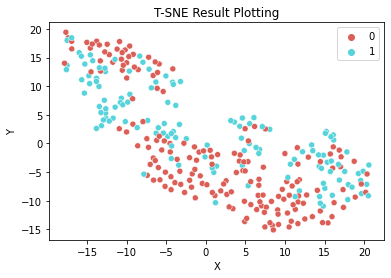

In [ ]:
# plotting the clustering result while using the clusters generated from all the dataset (doesn't have reduced dimensions)
sns.scatterplot(x="X", y="Y", hue = df_tsne_result.Cluster.tolist(),
                palette=sns.color_palette("hls", 2),
                data=df_tsne_result).set(title="T-SNE Result Plotting")

# Applying K-Means Algorithm on T-SNE Results

**Get Clusters from the T-SNE result using K Means**

In [ ]:
df_tsne_kmeans = pd.DataFrame(x_tsne) # copying the tsne results
df_tsne_kmeans.columns = ['X','Y']  #renaming the columns to X and Y

df_tsne_kmeans.head()

,X,Y
0,5.482312,-0.017430
1,-10.673324,7.905264
2,13.360549,-0.257150
3,-2.688773,-8.560649
4,9.069626,-11.606927


In [ ]:
km = KMeans(n_clusters=2)
clusters_tsne = km.fit_predict(df_tsne_kmeans) # calculating NEW clusters using K-Means on the T-SNE results

df_tsne_kmeans["Cluster"] = clusters_tsne # adding the NEW clusters to our data frame

[Text(0.5, 1.0, 'K-Means + T-SNE Result Plotting')]

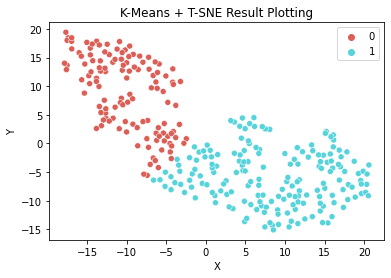

In [ ]:
# plotting the clustering result while using the clusters generated from T-SNE results  (reduced dimensions)
sns.scatterplot(x="X", y="Y", hue = df_tsne_kmeans.Cluster.tolist(),
                palette=sns.color_palette("hls", 2),
                data=df_tsne_kmeans).set(title="K-Means + T-SNE Result Plotting")